<a href="https://colab.research.google.com/github/navroz-lamba/DS-Unit-2-Linear-Models/blob/master/214_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression
- do train/validate/test split
- begin with baselines for classification
- express and explain the intuition and interpretation of Logistic Regression
- use sklearn.linear_model.LogisticRegression to fit and interpret Logistic Regression models

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

# Wrangle

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
import pandas as pd
train = pd.read_csv(DATA_PATH+'titanic/train.csv')
test = pd.read_csv(DATA_PATH+'titanic/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Splits

In [ ]:
# Split our FM from our TV
y = train['Survived']
X = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)

In [ ]:
# Split our training data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)

(891, 9)
(712, 9)
(179, 9)


# Baseline

With classification, we use a **majority classifier**. Our metric will be **accuracy score**.

In [ ]:
print('Baseline Accuracy Score:', y_train.value_counts(normalize=True).max())

Baseline Accuracy Score: 0.6235955056179775


# Build Model

## Why Linear Regression doesn't work for classificaton

In [ ]:
print(X_train.Age.isnull().sum())

140


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # Instantiate Predictor
# lin_model = LinearRegression()

# # Instantiate Transformer
# imp = SimpleImputer()

# # Transform training data
# XT_train = imp.fit_transform(X_train[['Age']])

# # Fit
# lin_model.fit(XT_train, y_train)

# # Predit
# y_pred_lin = lin_model.predict(XT_train)

# Using a pipeline
lin_model = Pipeline([
    ('imputer', SimpleImputer()),
    ('regressor', LinearRegression())
])

lin_model.fit(X_train[['Age']], y_train)

y_pred_lin = lin_model.predict(X_train[['Age']])

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

Text(0, 0.5, 'survived')

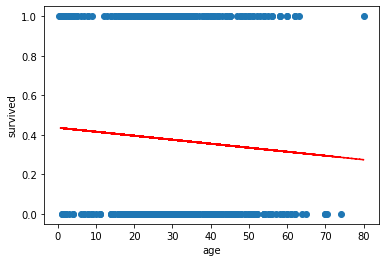

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train['Age'], y_train)
plt.plot(X_train['Age'], y_pred_lin, color='red', linestyle='--')
plt.xlabel('age')
plt.ylabel('survived')

## Why Logistic Regression Works for classification

In [ ]:
from sklearn.linear_model import LogisticRegression

# Using a pipeline
log_model = Pipeline([
    ('imputer', SimpleImputer()),
    ('regressor', LogisticRegression())
])

log_model.fit(X_train[['Age']], y_train)

y_pred_log = log_model.predict(X_train[['Age']])

## Putting it all together: Logistic Regression with all the features

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
full_model = Pipeline([
                       ('encoder', OneHotEncoder(cols=['Sex', 'Embarked'])),
                       ('imputer', SimpleImputer()),
                       ('regressor', LogisticRegression())
])

full_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Check Metrics

In [ ]:
print('Training Accuracy:', full_model.score(X_train, y_train))
print('Validation Accuracy:', full_model.score(X_val, y_val))

Training Accuracy: 0.8019662921348315
Validation Accuracy: 0.7988826815642458


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])